# <center> Iris Flower Classification Project using Machine Learning

## Steps to Classify Iris Flower:

1. Load the data
2. Analyze and visualize the dataset
3. Model training.
4. Model Evaluation.
5. Testing the model.

## Step 1 – Load the data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,NaN,NaN,NaN,NaN
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 0th row contains all null values so delete 0th row by drop method

In [3]:
df = df.drop(labels=0,axis=0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


## Step 2 – Analyze and visualize the dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 1 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  148 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  148 non-null    float64
 3   petal_width   148 non-null    float64
 4   species       148 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df['species'].value_counts()

Iris-versicolor    50
Iris-setosa        49
Iris-virginica     49
Name: species, dtype: int64

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,148.000000,148.000000,148.000000,148.000000
mean,5.845946,3.048649,3.763514,1.197973
std,0.830898,0.434011,1.760494,0.758487
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### visualization of the dataset.

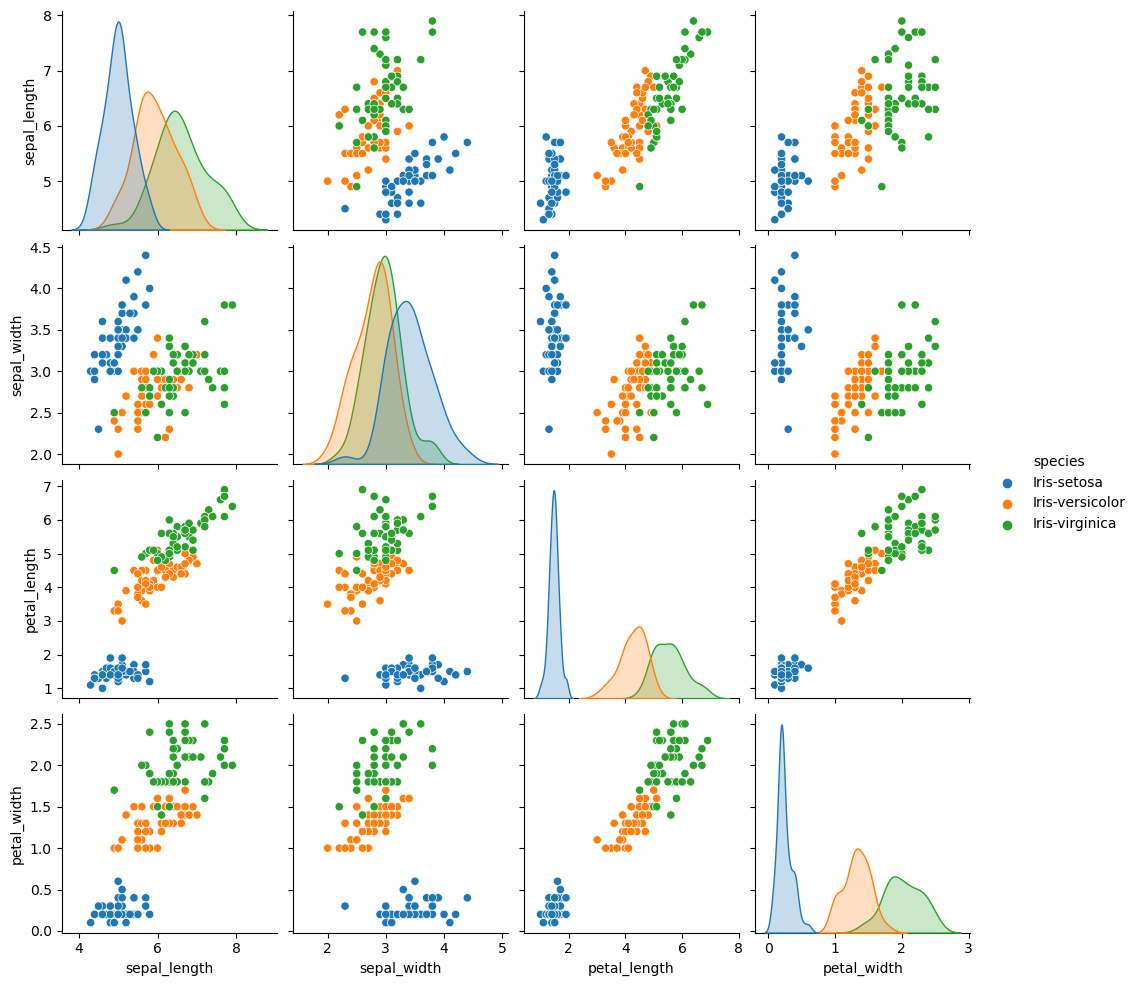

In [8]:
sns.pairplot(df,hue='species')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

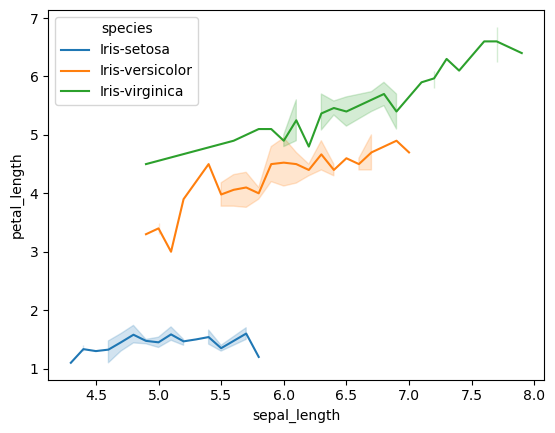

In [9]:
sns.lineplot(x='sepal_length',y='petal_length',data=df,hue='species')

<Axes: xlabel='species', ylabel='sepal_length'>

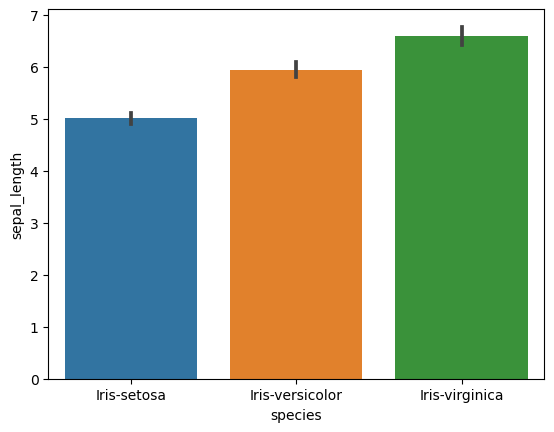

In [10]:
sns.barplot(x='species',y='sepal_length',data=df)

## Step 3 – Model training:

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[1:,0:4], df.iloc[1:,4], test_size=0.2)

In [12]:
df.shape ,X_train.shape, X_test.shape

((148, 5), (117, 4), (30, 4))

In [13]:
df.shape ,y_train.shape, y_test.shape

((148, 5), (117,), (30,))

### Support vector machine algorithm

In [14]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train,y_train)

SVC()

## Step 4 – Model Evaluation:

In [15]:
# Predict from the test dataset
prediction = svn.predict(X_test)
prediction

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

### Calculation of the accuracy

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction,y_test)

0.9666666666666667

In [17]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## Step 5 – Testing the model:

In [18]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


In [19]:
X_new = np.array([[8,8,8,8]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-virginica']
